# **Laboratorium 1 - Dane**
---

*Skrypt zawiera wprowadzenie do pakietów Numpy (macierze) oraz reprezentacji obrazów cyfrowych w pakietach OpenCV oraz scikit-image*

---

# 1. Pakiet Numpy

Podstawowy zasób struktur danych języka Python nie zawiera struktur kluczowych dla wszelkiego rodzaju obliczeń numerycznych - wektorów i tablic (macierzy). Przyczyną takiego stanu rzeczy jest fakt, iż język Python w swojej pierwotnej wersji nie był przeznaczony do tego rodzaju obliczeń. Braki w zakresie odpowiednich struktur danych oraz istotnych procedur obliczeń numerycznych zostały uzupełnione wraz z pojawieniem się pakietu `Numpy`. Jak każdy pakiet języka Python, także i `numpy` wymaga wcześniejszego wczytania.

In [2]:
import numpy as np

Macierze w pakiecie `numpy` moga być incjowane na kilka sposobów:

* na podstawie listy lub krotki wartości
* użwając funkcji przeznaczonych do tworzenia macierzy (np. `arange`, `linspace`)
* wczytując jej elementy z macierzy

## 1.1 Tworzenie macierzy na podstawie list

Do utworzenia nowej macierzy można wykorzystać funkcję `numpy.array`, której argumentem jest lista.

In [3]:
l = [1,2,3,4]
v = np.array(l)
print(l,type(l))
print(v,type(v))

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


In [3]:
# argumentem w tym przypadku jest lista list - w efekcie powstaje macierz dwuwymiarowa
M = np.array([[1, 2, 0], [3, 4, 9]])
M

array([[1, 2, 0],
       [3, 4, 9]])

Argumentem `numpy.array` może być także lista krotek.

In [4]:
M2 = np.array([(1., 2.0), (3.0, 4.0)])

M2

array([[1., 2.],
       [3., 4.]])

Obie macierze `v` i `M` są typu `ndarray`, zaimplementowanego w pakiecie `numpy`.

In [5]:
type(v), type(M), type(M2)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

Macierz jest obiektem. Informację o rozmiarze macierzy uzyskujemy stosując metodę `.shape`.

In [6]:
print(v.shape)
print(M.shape)
print(M2.shape)

(4,)
(2, 3)
(2, 2)


Informację o liczbie elementów macierzy zwraca metoda `ndarray.size`, zaś o liczbie wymiarów: `ndarray.ndim`:

In [7]:
print(v.ndim,v.size)
print(M.ndim,M.size)

1 4
2 6


Identyczne efekty można uzyskać stosując funkcje `numpy.shape`, `numpy.size`, `numpy.ndim`, których argumentem jest macierz. 

In [8]:
print(np.shape(M),",",np.ndim(M),",",np.size(M))

(2, 3) , 2 , 6


In [9]:
np.size(M)

6

Macierz jest homogeniczna pod względem wartości elementów (inaczej niż lista czy krotka). Typ danych elementów macierzy zależy od formatu liczb użytych w procesie inicjacji macierzy. Typ danych zwraca metoda `numpy.dtype`.

In [10]:
M.dtype

dtype('int32')

In [11]:
M2.dtype

dtype('float64')

Typ danych można także narzucić podczas tworzenia macierzy, korzystając z argumentu `dtype`: 

In [12]:
M1 = np.array([[1, 2], [3, 4]], dtype=complex)

M1

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Z komendą `dtype` mogą być używane wszystkie typy danych: `int`, `float`, `complex`, `bool`, `object`, itd.

Dodatkowo można określić rozmiar danych (w bitach): `int64`, `int16`, `float128`, `complex128`.

## 1.2 Tworzenie macierzy przy pomocy funkcji

Macierze mogą być także tworzone z wykorzystaniem funkcji, które wypełniają macierz wartościami, zgodnie z ustaloną zasadą. 

Funkcja `arange` zwraca ciąg wartości o zadanej wartości początkowej, górnym ograniczeniu oraz kroku.

In [13]:
x = np.arange(0, 10, 1) # argumenty: start, stop, krok

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

Funkcje `linspace` and `logspace` generują strukturę dwuwymiarową o próbkowaniu liniowym lub logarytmicznym.

In [15]:
# w przypadku linspace, wyjściowa macierz zawiera oba ograniczenia - dolne i górne
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

Funkcja `mgrid` zwraca dwie macierze zawierające współrzędne x oraz y siatki próbkowania.

In [16]:
x, y = np.mgrid[0:5, 0:5] 

In [17]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [18]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

Funkcje `rand` oraz `randn` zwracają macierze wartości losowych z zakresu 0...1, przy czym efektem tej pierwszej jest dystrybcja zgodna z rozkładem jednostajnym, zaś drugiej - dystrybucja zgodna z rozkładem normalnym.

In [19]:
# liczby losowe z zakresu [0,1] - rozkład jednostajny
np.random.rand(5,5)

array([[0.74865196, 0.17602077, 0.93657758, 0.40307615, 0.98645622],
       [0.7360972 , 0.22721522, 0.39860172, 0.41630727, 0.34439504],
       [0.82955336, 0.58242741, 0.5493785 , 0.84845077, 0.7437162 ],
       [0.71176847, 0.36783031, 0.25718481, 0.43026132, 0.10195756],
       [0.51090023, 0.17969111, 0.99053505, 0.54870822, 0.07393216]])

In [20]:
# liczby losowe z zakresu [0,1] - rozkład normalny: średnia = 0, odchylenie standardowe = 1
np.random.randn(5,5)

array([[-0.033703  , -0.14314001,  0.45341412, -1.61270996, -0.14456941],
       [ 0.55891688,  0.65576388, -1.00441271,  0.43533504, -0.46519822],
       [-0.41526119,  0.53026997, -0.40758689,  1.76970089, -0.02525939],
       [ 1.49946106, -0.56263729, -1.03138471, -0.22357192,  0.24241337],
       [ 1.21549739, -1.46355446,  0.10764665, -1.12181383, -1.20030877]])

Funkcja `diag` służy do tworzenia macierzy diagonalnej.

In [21]:
# macierz diagonalna
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [22]:
# macierz diagonalna z przesunięciem diagonali
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

Funkcje `zeros` oraz `ones` zwracają macierze składające się z samych zer i jedynek.

In [23]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [24]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 1.3 Zapis i odczyt macierzy z dysku

Komenda `numpy.savetxt` służy do zapisu macierzy w formacie `.csv`.:

In [25]:
M = np.random.rand(3,3)
np.savetxt("macierz.csv", M)
M

array([[2.79866968e-02, 8.94218292e-01, 9.08636695e-01],
       [9.05550226e-05, 8.46277641e-01, 6.10447932e-01],
       [6.15857738e-01, 9.78521307e-01, 4.17780233e-01]])

Tak zapisane dane można wczytać przy pomocy komendy `numpy.loadtxt`

In [26]:
M1 = np.loadtxt("macierz.csv")
M1

array([[2.79866968e-02, 8.94218292e-01, 9.08636695e-01],
       [9.05550226e-05, 8.46277641e-01, 6.10447932e-01],
       [6.15857738e-01, 9.78521307e-01, 4.17780233e-01]])

Pakiet `numpy` umożliwia także zapis macierzy w swoim własnym formacie przy użyciu komend `numpy.save` and `numpy.load`:

In [27]:
np.save("macierz.npy", M)

In [28]:
np.load ("macierz.npy")


array([[2.79866968e-02, 8.94218292e-01, 9.08636695e-01],
       [9.05550226e-05, 8.46277641e-01, 6.10447932e-01],
       [6.15857738e-01, 9.78521307e-01, 4.17780233e-01]])

## 1.4 Indeksowanie macierzy

Indeksowanie macierzy następuje przez podanie współrzędnych elementu/ów w nawiasach kwadratowych:

In [29]:
print(M)
# element o wsp. 1,2 (indeksowanie zaczynamy od 0,0)
M[1,2]

[[2.79866968e-02 8.94218292e-01 9.08636695e-01]
 [9.05550226e-05 8.46277641e-01 6.10447932e-01]
 [6.15857738e-01 9.78521307e-01 4.17780233e-01]]


0.6104479323746947

Pominięcie drugiego indeksu daje w efekcie wiersz o numerze równym podanemu, pojedynczemu indeksowi.

In [30]:
M[1]

array([9.05550226e-05, 8.46277641e-01, 6.10447932e-01])

Dostęp do wszystkich elementów w danym wierszu lub kolumnie uzyskujemy, wpisując zamiast indeksu, znak `:`.

In [31]:
M[1,:] # drugi (z kolei) wiersz (efekt identyczny z M[1])

array([9.05550226e-05, 8.46277641e-01, 6.10447932e-01])

In [32]:
M[:,1] # kolumna o indeksie 1 (druga z kolei)

array([0.89421829, 0.84627764, 0.97852131])

Odwołując się do elementów o konkretnych indeksach możmy także dokonać przypisania wartości:

In [33]:
M[0,0] == 8

False

In [34]:
M

array([[2.79866968e-02, 8.94218292e-01, 9.08636695e-01],
       [9.05550226e-05, 8.46277641e-01, 6.10447932e-01],
       [6.15857738e-01, 9.78521307e-01, 4.17780233e-01]])

In [35]:
# podobnie dla całych wierszy i kolumn
M[1,:] = 88
M[:,2] = 123

In [36]:
M

array([[2.79866968e-02, 8.94218292e-01, 1.23000000e+02],
       [8.80000000e+01, 8.80000000e+01, 1.23000000e+02],
       [6.15857738e-01, 9.78521307e-01, 1.23000000e+02]])

Poniższe metody służą do pobierania parametrów macierzy: liczby bajtów na element, liczbę bajtów zajmowanych przez całą macierz oraz liczbę jej wymiarów.

In [37]:
print(M.itemsize, M.nbytes, M.ndim)

8 72 2


## 1.5 Podmacierze

Podmacierz danej macierzy uzyskujemy ideksując następująco: `M[lower:upper:step]`

In [38]:
A = np.array([11,22,33,44,55])
A

array([11, 22, 33, 44, 55])

In [39]:
A[1:3]

array([22, 33])

Poprzez powyższy sposób indeksowania można także zmieniać wartości elementów macierzy:

In [40]:
A[1:3] = [-2,-3]

A

array([11, -2, -3, 44, 55])

Dowolny z trzech parametrów `M[lower:upper:step]` można pominąć:

In [41]:
A[::] # wartości domyślne - cała macierz

array([11, -2, -3, 44, 55])

In [42]:
A

array([11, -2, -3, 44, 55])

In [43]:
A[::2] # co drugi element

array([11, -3, 55])

In [44]:
A[:3] # pierwsze trzy elementy

array([11, -2, -3])

In [45]:
A[3:] # elementy od trzeciego w górę

array([44, 55])

Indeksy ujemne to liczenie od końca:

In [46]:
A = np.array([1,2,3,4,5])

In [47]:
A[-1] # ostatni element

5

In [48]:
A[-3:] # ostatnie trzy elementy

array([3, 4, 5])

Analogicznie dla macierzy wielowymiarowych:

In [49]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [50]:
# podmacierz - usuwamy ostatni wiersz i kolumnę
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [51]:
# co drugi element
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

Indeksowanie przez podanie wektora numerów indeksów 

In [52]:
indeksy_wierszy = [1, 2, 3]
A[indeksy_wierszy]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [53]:
indeksy_kolumn = [1, 2, -1] 
A[:,indeksy_kolumn]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

Podanie dwóch wektorów pozwala na ekstrakcję elementów macierzy położonych w wierszach i kolumnach o indeksach zawartych w odpowiednich wektorach.

In [54]:
indeksy_kolumn = [1, 2, -1] 
A[indeksy_wierszy,indeksy_kolumn]

array([11, 22, 34])

Indeksowanie jest możliwe także z wykorzystaniem masek binarnych typu `bool`, wskazujących (poprzez wartości `True`) na pożądane elementy (indeksowanie logiczne).


In [55]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [56]:
maska = np.array([True, False, True, False, False])
B[maska]

array([0, 2])

In [57]:
# to samo inaczej
maska = np.array([1,0,1,0,0], dtype=bool)
B[maska]

array([0, 2])

In [58]:
M>0.6


array([[False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])


Stosując ten typ indeksowania można wybierać te elementy macierzy, które spełniają warunek logiczny:

In [63]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [64]:
x<7.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

In [65]:
maska = (5 < x) * (x < 7.5)

maska

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [66]:
x[maska]

array([5.5, 6. , 6.5, 7. ])

## 1.6 Podstawowe operatory

Operacje arytmetyczne

In [67]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [68]:
v1 * 2

array([0, 2, 4, 6, 8])

In [69]:
v1 + 2

array([2, 3, 4, 5, 6])

In [70]:
print(A, "\n\n", A * 2 , "\n\n", A + 2)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]] 

 [[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]] 

 [[ 2  3  4  5  6]
 [12 13 14 15 16]
 [22 23 24 25 26]
 [32 33 34 35 36]
 [42 43 44 45 46]]


W przypadku mnożenia standardowo wykonywane jest mnożenie **element-po-elemencie**:

In [71]:
A * A 

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [72]:
v1 * v1

array([ 0,  1,  4,  9, 16])

Przypadek dwóch macierzy:

In [73]:
A.shape, v1.shape

((5, 5), (5,))

In [74]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

Mnożenie macierzowe wymaga użycia funkcji `dot`:

In [75]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [76]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [77]:
np.dot(v1, v1)

30

Alternatywnie można użyć operatora `@`

In [78]:
v1@v1

30

## 1.7 Statystyki opisowe

Pakiet `numpy` oferuje szereg funkcji wyznaczających podstawowe statystyki opisowe. 

In [79]:
print(A)
# wartość średnia
np.mean(A)
# odchylenie standardowe i wariancja
np.std(A[:,3]), np.var(A[:,3]), np.min(A[:,2]), np.max(A[:,2])
# wartości minimalne i maksymalne


[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


(14.142135623730951, 200.0, 2, 42)

In [80]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
# suma
np.sum(d)

45

In [82]:
# iloczyn elementów
np.prod(d+1)

3628800

In [83]:
# sumy skumulowane
print(d)
dc = np.cumsum(d)
print(dc)
dc1 = dc/dc.max()
print(dc1*255)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  3  6 10 15 21 28 36 45]
[  0.           5.66666667  17.          34.          56.66666667
  85.         119.         158.66666667 204.         255.        ]


In [84]:
# iloczyny skumulowane
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800], dtype=int32)

## 1.8 Łączenie, przekształcanie i kopiowanie macierzy

Z pomocą funkcji `repeat`, `tile`, `vstack`, `hstack`, oraz `concatenate` można tworzyć większe macierze przez zwielokrotnianie mniejszych. Instrukcja `repeat` powtarza zadaną macierz ustaloną ilość razy.

In [85]:
a = np.array([[1, 2], [3, 4]])

In [86]:
# każdy element powtórzony 3 razy
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [87]:
# nowa macierz stworzona poprzez trzykrotne powtórzenie starej
mac = np.tile(a, 3)

Instrukcje `concatenate`, `hstack` i `vstack` służą do łączenia macierzy.

In [88]:
b = np.array([[5, 6]])

In [89]:
mac.T

array([[1, 3],
       [2, 4],
       [1, 3],
       [2, 4],
       [1, 3],
       [2, 4]])

In [90]:
a

array([[1, 2],
       [3, 4]])

In [91]:
b.T

array([[5],
       [6]])

In [92]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [93]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [94]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

Macierz może być kopiowana na dwa sposoby. Typowe odwołanie do macierzy jest odwołaniem przez referencję (nazwa jest wskaźnikiem). 

In [95]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [96]:
# B wskazuje na ten sam obszar pamięci co A
B = A 

In [97]:
# zmiana w B wpływa na A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

Nie zawsze taki sposób zachowania jest pożądany. Gdy konieczne jest pozyskanie wiernej kopii oryginalnej macierzy (kopia głęboka), umieszczonej w odrębnym miejscu w pamięci, konieczne jest zastosowanie funkcji `copy`.

In [98]:
A

array([[10,  2],
       [ 3,  4]])

In [99]:
B = A

In [100]:
B

array([[10,  2],
       [ 3,  4]])

In [101]:
B[1,1] = 1001
B

array([[  10,    2],
       [   3, 1001]])

In [102]:
A

array([[  10,    2],
       [   3, 1001]])

In [103]:
C = np.copy(A)

In [104]:
C


array([[  10,    2],
       [   3, 1001]])

In [105]:
C[1,1] = 111
C

array([[ 10,   2],
       [  3, 111]])

In [106]:
A

array([[  10,    2],
       [   3, 1001]])

In [107]:
# teraz, modyfikując B nie wpływamy na A
C[0,0] = -5
C

array([[ -5,   2],
       [  3, 111]])

Informację o tym, czy dane dwie zmienne odnoszą się do tej samej czy też różnych macierzy, można uzyskać korzystając z komendy `is`

In [108]:
print ("Czy A i B to ta sama macierz ?" , A is B)
print ("Czy A i C to ta sama macierz ?" , A is C)

Czy A i B to ta sama macierz ? True
Czy A i C to ta sama macierz ? False


# 2. Obraz cyfrowy w Pythonie

Istnieje kilka pakietów umożliwiających wykonywanie operacji na obrazach cyfrowych. W trakcie ćwiczeń będą wykorzystywane dwa najpopularniejsze pakiety - `cv2`, oraz `skimage`. Pakiet `cv2` umożliwia dostęp z poziomu Pythona do jednej z największych bibliotek przetwarzania obrazów, biblioteki [openCV](https://opencv.org/). Pakiet `skimage` czyli `scikit-image` jest drugim z najpopularniejszych pakietów przetwarzania obrazów dla języka Python, który stanowi istotne uzupełnienie popularnego pakietu uczenia maszynowego `scikit-learn`  .

Jak każdy pakiet, także i `opencv` wymaga wczytania na początku sesji. Dodatkowo jest wczytywana część pakietu `matplotlib` jako niezbędna do wyświetlania obrazów. 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)


4.6.0


## 2.1 Wczytywanie i wyświetlanie obrazów (openCV)

Wczytywanie obrazu do macierzy - macierzowej struktury danych pakietu `numpy` - jest wykonywane z użyciem metody `imread`. W przypadku gdy otwrcie pliku i ściągnięcie z niego danych się powiedzie, funkcja zwraca macierz. W zależności od typu obrazu oraz opcji wczytywania obrazu, macierz ta jest jednowymiarowa dla obrazów w skali szarości lub trójwymiarowa - dla obrazów kolorowych. W tym drugim przypadku trzeci wymiar to trzy warstwy odpowiadające poszczególnym składowym koloru.

In [2]:
obraz = cv2.imread('baboon.jpg')
# parametry macierzy obrazu - obraz kolorowy
print(obraz.shape, type(obraz))
obraz2 = cv2.imread('baboon.jpg',0)
# parametry macierzy obrazu - obraz w skali szarości
print(obraz2.shape, type(obraz2))

(512, 512, 3) <class 'numpy.ndarray'>
(512, 512) <class 'numpy.ndarray'>


Jeden ze sposobów wyświetlenia obrazu (najwygodniejszym w przypadku korzystania z Jupyter Notebook) polega na wykorzystaniu komendy `imshow` z pakietu `matplotlib`.

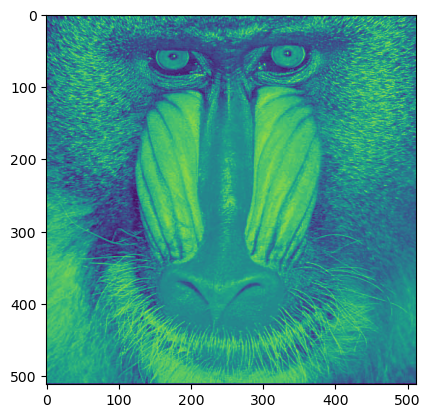

In [3]:
plt.imshow(obraz2)

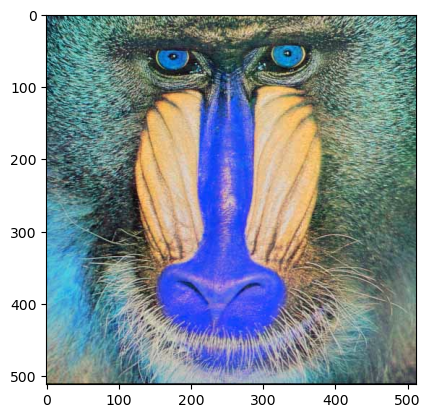

In [4]:
# wyświetlanie obrazu kolorowego - błędna kolejność składowych 
plt.imshow(obraz)

UWAGA - nietypowe kolory w powyższym obrazie wynikają ze specyficznej kolejności składowych RGB, która została zaimplementowana w pakiecie openCV. Standartowo pakiet ten zapisuje składowe w kolejności B (niebieska), G (zielona) i R (czerwona). Komenda `imshow` z pakietu `matplotlib` z kolei wymaga typowej kolejności składowych tj. R (czerwona), G (zielona) i B (niebieska). Dla poprawnego wyświetlenia obrazu należy więc dokonać zamiany składowych. Możemy tego dokonać m.in. korzystając z funkcji konwersji przestrzeni kolorów `cvtColor`, waksując poprzez stosowny argument wywołania przestrzeń oryginalną (BGR) i docelową (RGB).

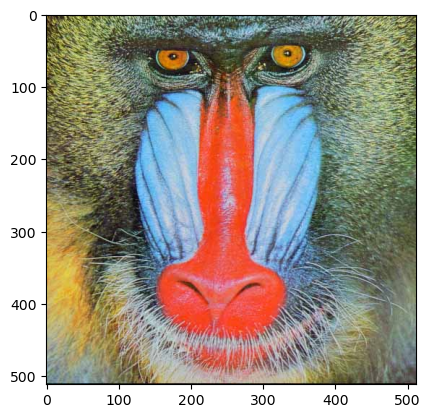

In [5]:
obraz1 = cv2.cvtColor(obraz,cv2.COLOR_BGR2RGB)
plt.imshow(obraz1) 

Obraz w skali szarości jest traktowany jak obraz indeksowany tj. taki w którym wartość piksela jest indeksem koloru w tablicy kolorów. Wyświetlenie takiego obrazu wymaga więc podania palety kolorów w której obraz jest wyświetlany. Paleta zawiera barwy przypisane poszczególnym wartościom, jakie może przyjmować piksel. W przypadku obrazu w skali szarości tymi wartościami są po prostu kolejne odcienie szarości od czerni do bieli. 

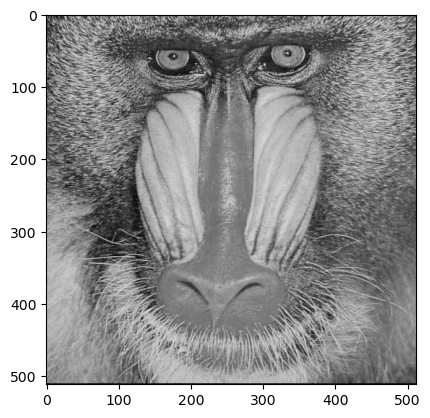

In [6]:
plt.imshow(obraz2,cmap='gray')

Przykładowe inne palety kolorów to `Reds`,`Greens`,`Blues`,`plasma` i wiele [innych](https://matplotlib.org/tutorials/colors/colormaps.html).

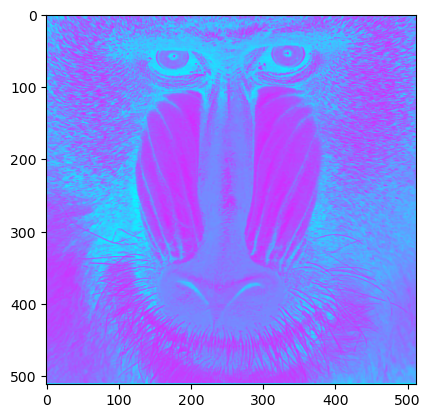

In [7]:
plt.imshow(obraz2,cmap='cool')

Wyswietlanie dwóch obrazów z ustaleniem rozmiaru obszaru prezentacji obrazu.

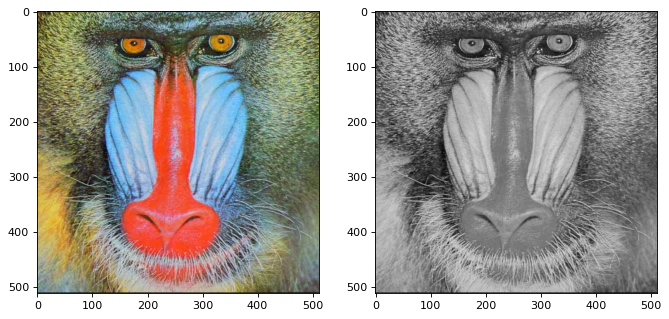

In [8]:
obraz_rgb = cv2.imread('baboon.jpg')
obraz_szar = cv2.imread('baboon.jpg',0)
plt.figure(figsize=(10,5), dpi = 80)
plt.subplot(1,2,1)   
plt.imshow(cv2.cvtColor(obraz_rgb,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(obraz_szar,cmap='gray')      

## 2.2 Wczytywanie i wyświetlanie obrazów (scikit-image)

Instrukcja do wczytywania obrazów w pakiecie `scikit-image` to także `imread`, ale tym razem z tego właśnie pakietu (ta sama nazwa, ale inne pakiety !). W przypadku scikit-image obraz jest wczytywany z klasyczną kolejnością składowych: czerwona, zielona i niebieska. Dlatego nie ma potrzeby zamiany kanałów na potrzeby wyświetlania. 

(512, 512, 3) <class 'numpy.ndarray'>


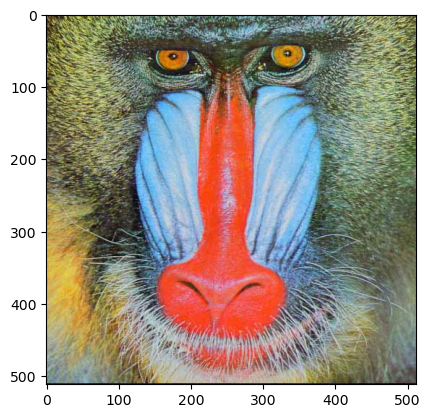

In [9]:
from skimage import io
obraz = io.imread('baboon.jpg')
# parametry macierzy obrazu - obraz kolorowy
print(obraz.shape, type(obraz))
plt.imshow(obraz)
# obraz2 = cv2.imread('baboon.jpg',0)
# parametry macierzy obra zu - obraz w skali szarości
# print(obraz2.shape, type(obraz2))

Wykorzystując funkcję `imread` możliwy jest także import obrazu z sieci, przez podanie jego adresu url. 

(512, 512, 3) <class 'numpy.ndarray'>


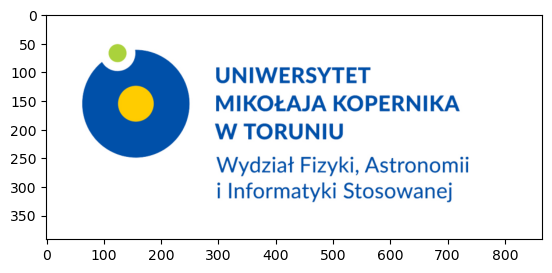

In [10]:
from skimage import io
#url = "http://www.ee.pw.edu.pl/wp-content/uploads/2016/11/WE-znak.png"
url = "https://wydzialy.umk.pl/_szablony/grafika/logo5.png"
obraz_www = io.imread(url)
print(obraz.shape, type(obraz_www))
plt.imshow(obraz_www) 

## 2.3 Dostęp do pikseli obrazu

Niezależnie od pakietu przetwarzania obrażów, z jakiego korzystami, obrazy są macierzami pakietu `numpy`. Sprawdzanie rozmiarów obrazu i typu danych wykonuje się tak samo jak dla tego typu macierzy. 

In [11]:
ok = obraz_rgb  # krótsza nazwa obrazu kolorowego
os = obraz_szar # krótsza nazwa obrazu w skali szarości
print("obraz kolorowy - typ: ", ok.dtype, ", rozmiary: ", ok.shape, ", zajętośc pamięci: ", ok.size)
print("obraz w skali szarości - typ: ", os.dtype, ", rozmiary: ", os.shape, ", zajętośc pamięci: ", os.size)


obraz kolorowy - typ:  uint8 , rozmiary:  (512, 512, 3) , zajętośc pamięci:  786432
obraz w skali szarości - typ:  uint8 , rozmiary:  (512, 512) , zajętośc pamięci:  262144


Ponieważ obraz cyfrowy jest macierzą pakietu `numpy`, to dostęp do jego elementów jest tożsamy z dostępem do odpowiednich elementów takiej macierzy.

In [12]:
px = 100
py = 100
piks1 = ok[px,py]
piks1g = ok[px,py,1]
piks2 = os[px,py]
print("ok(",px,",",py,")=",piks1)
print("ok(",px,",",py,",1)=",piks1g)
print("os(",px,",",py,")=",piks2)

ok( 100 , 100 )= [111 133 121]
ok( 100 , 100 ,1)= 133
os( 100 , 100 )= 127


Zmiana wartości pikseli

In [13]:
# pojedyncza składowa
print("przed: ",obraz_rgb[px,py])
ok[px,py,2]=1
print("po zmianie jednej składowej: ",obraz_rgb[px,py])
# cały piksel
ok[px,py]= [10,20,30]
print("po zmianie całego piksela: ",obraz_rgb[px,py])

przed:  [111 133 121]
po zmianie jednej składowej:  [111 133   1]
po zmianie całego piksela:  [10 20 30]


> **Zadanie** jak inaczej należałoby zainicjować zmienną `ok` aby zmiana wartości `ok` nie skutkowała zmianą wartości `obraz_rgb` ? Innymi słowy - jak utworzyć kopię obrazu ? 

Dostęp do pojedynczych wartości macierzy jest możliwy także poprzez metody `item` oraz `itemset`

In [14]:
print(ok.item(100,100,1))
print(os.item(100,100))
os.itemset(100,100,128)
print(os.item(100,100))

20
127
128


Wycinanie fragmentu obrazu (ROI = Region Of Interests) wymaga odwołania poprzez zakres współrzędnych.

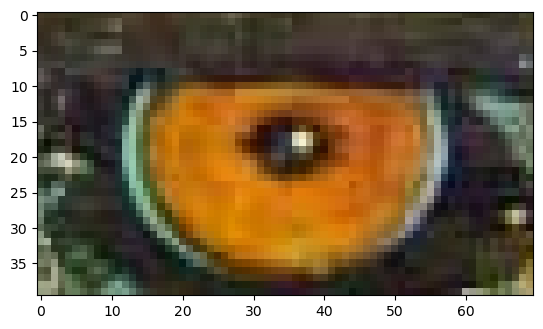

In [15]:
oko = ok[40:80,140:210]
plt.imshow(cv2.cvtColor(oko,cv2.COLOR_BGR2RGB))

## 2.4 Przestrzenie kolorów

Obraz kolorowy składa się z trzech składowych. W modelu RGB składowe te określają intensywność trzech barw podstawowych czerwonej, zielonej i niebieskiej. Aby otrzymać poszczególne składowe, obraz kolorowy należy zdekomponować na trzy obrazy w skali szarości. Możliwa jest także operacja odwrotna - z trzech obrazów składowych koloru tworzony jest jeden obraz kolorowy.

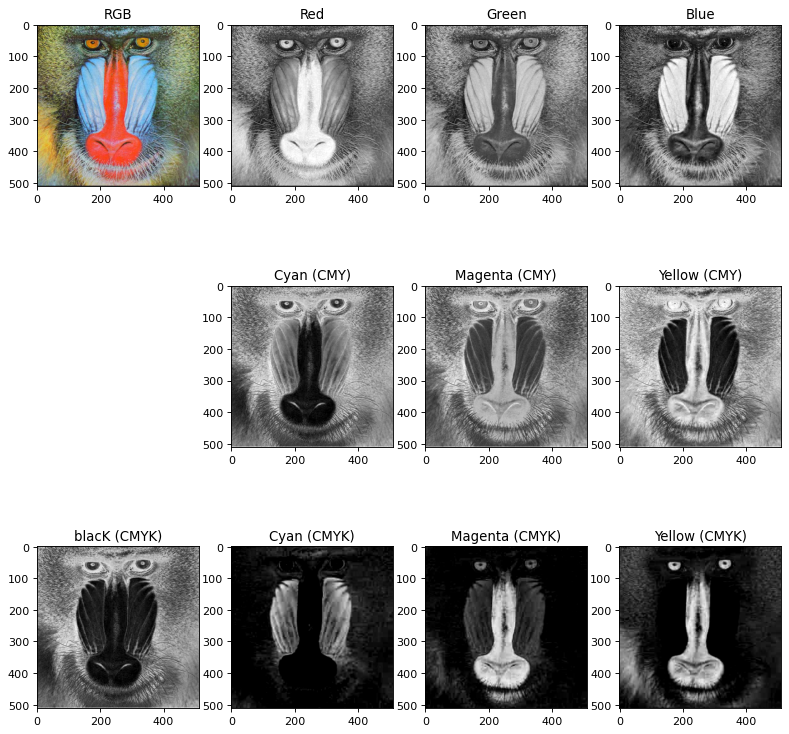

In [16]:
obraz = io.imread('baboon.jpg')
plt.figure(figsize=(12,12), dpi= 80)
ax = plt.subplot(3,4,1)   
ax.set_title("RGB")
plt.imshow(obraz)
ax = plt.subplot(3,4,2)
ax.set_title("Red")
plt.imshow(obraz[:,:,0],cmap='gray')
ax = plt.subplot(3,4,3)
ax.set_title("Green")
plt.imshow(obraz[:,:,1],cmap='gray')
ax = plt.subplot(3,4,4)
ax.set_title("Blue")
plt.imshow(obraz[:,:,2],cmap='gray')
# wyznaczamy składowe CMY
cmy_c = 255 - obraz[:,:,0]
cmy_m = 255 - obraz[:,:,1]
cmy_y = 255 - obraz[:,:,2] 
ax = plt.subplot(3,4,6)
ax.set_title("Cyan (CMY)")
plt.imshow(cmy_c,cmap='gray')
ax = plt.subplot(3,4,7)
ax.set_title("Magenta (CMY)")
plt.imshow(cmy_m,cmap='gray')
ax = plt.subplot(3,4,8)
ax.set_title("Yellow (CMY)")
plt.imshow(cmy_y,cmap='gray')
# wyznaczamy składowe CMYK
cmyk_k = np.minimum(cmy_c,np.minimum(cmy_m,cmy_y))
cmyk_c = cmy_c - cmyk_k
cmyk_m = cmy_m - cmyk_k
cmyk_y = cmy_y - cmyk_k
ax = plt.subplot(3,4,9)
ax.set_title("blacK (CMYK)")
plt.imshow(cmyk_k,cmap='gray')
ax = plt.subplot(3,4,10)
ax.set_title("Cyan (CMYK)")
plt.imshow(cmyk_c,cmap='gray')
ax = plt.subplot(3,4,11)
ax.set_title("Magenta (CMYK)")
plt.imshow(cmyk_m,cmap='gray')
ax = plt.subplot(3,4,12)
ax.set_title("Yellow (CMYK)")
plt.imshow(cmyk_y,cmap='gray')

Inny sposób wyświetlania - jako pojedyncza macierz, sklejona z trzech. Obraz kolorowy może być reprentowany a także przetwarzany w innych przestrzeniach kolorów. Poniższe przykłady przedstawiają separację barwną (rozbicie na składowe koloru) na trzy składowe przestrzeni RGB, YUV oraz HSV. Przykład pokazuje przy okazji inny sposób wyświetlania składowych obrazów kolorowych.

In [17]:
cmy_c = 255 - obraz[:,:,0]
cmy_m = 255 - obraz[:,:,1]
cmy_k = 255 - obraz[:,:,2] 

cmyk_k = 255 - np.maximum(obraz[:,:,0],obraz[:,:,1],obraz[:,:,1])
cmyk_c = cmy_c - cmyk_k
cmyk_m = cmy_m - cmyk_k
cmyk_k = cmy_k - cmyk_k

Text(0.5, 1.0, 'przestrzeń HSV')

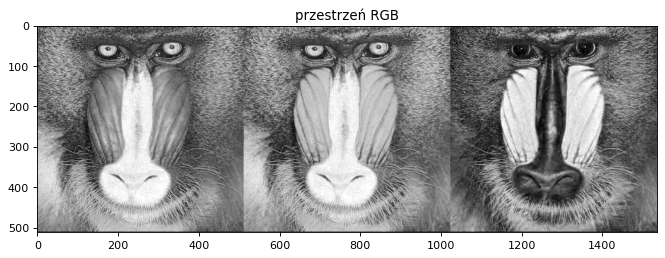

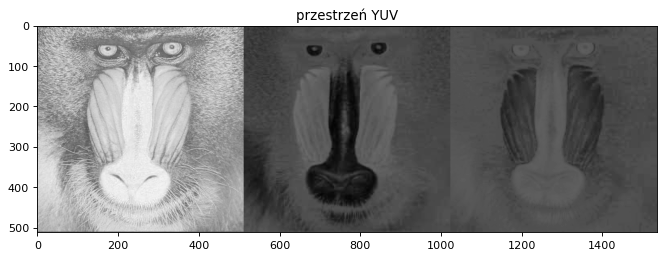

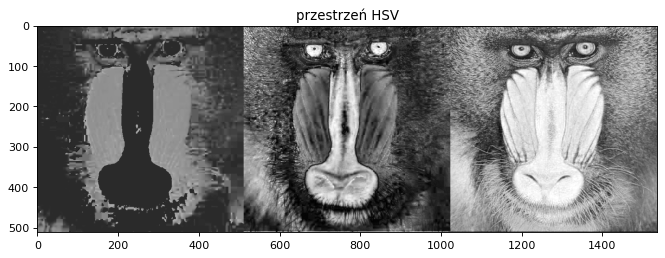

In [18]:
from skimage.color import rgb2hsv,rgb2yuv
plt.figure(figsize=(10,5),dpi = 80)
plt.imshow(np.hstack((obraz[:,:,0],obraz[:,:,1],obraz[:,:,2])),cmap='gray')
plt.title('przestrzeń RGB')
obraz_yuv = rgb2yuv(obraz)
plt.figure(figsize=(10,5),dpi = 80)
plt.imshow(np.hstack((obraz_yuv[:,:,0],obraz_yuv[:,:,1],obraz_yuv[:,:,2])),cmap='gray')
plt.title('przestrzeń YUV')
obraz_hsv = rgb2hsv(obraz)
plt.figure(figsize=(10,5),dpi = 80)
plt.imshow(np.hstack((obraz_hsv[:,:,0],obraz_hsv[:,:,1],obraz_hsv[:,:,2])),cmap='gray')
plt.title('przestrzeń HSV')

> **Zadanie** Wykonaj separacje barwne dla różnych przestrzeni docelowych dla dowolnego innego obrazu kolorowego, zwróć uwagę jak, w poszczególnych przestrzeniach, wyglądają obszar o określonych kolorach.

> **Zadanie** Podane powyżej przykłady ilustrują różne przestrzenie kolorów (barw) korzystając z pakietu `scikit-image`. Sprawdź jak analogiczne operacje można wykonać z wykorzystaniem pakietu `openCV`.

---
---
Historia zmian:
* wersja pierwotna r.akad 20/21 na bazie PRiAD: 1.11.2020 (MI)
* wersja na r.akad. 21/22: 18.10.2021 (MI)
* wersja na r.akad. 22/23: 3.11.2022 (MI)
* wersja uniwersalna r.akad 22/23: 26.04.2023 (MI)